In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from numpy import log

from scipy import linalg
from scipy import sparse
from scipy.sparse import csr_matrix

import pandas as pd

import sklearn.metrics.pairwise as knl
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [9,5] #globally set figure size
params = {'legend.fontsize': 'x-small',
         'axes.labelsize': 'x-small',
         'axes.titlesize':'x-small',
         'xtick.labelsize':6,
         'ytick.labelsize':6}
plt.rcParams.update(params)

from mpl_toolkits.mplot3d import Axes3D

import tadasets

# from ripser import ripser
# from persim import plot_diagrams



In [3]:
n = 4000 #4000 for surf plots
p = 500
r = 20  #r=20 for plots
sigma = 0 #0 for surf plots

np.random.seed(123)


In [4]:
#sample uniformly from torus
tor_rad = 0.25
tor_c = 1
Z = tadasets.torus(n,tor_c,a=tor_rad)
color_t1 = np.arctan2(Z[:,0],Z[:,1]) #colour by azimuth about origin
color_t2 = np.arctan2(Z[:,2],-(tor_c-(Z[:,0]**2+Z[:,1]**2)**0.5)) #colour by angle of elevation about center of tube

offset = 0
multiplier = 1
Z[:,0] = multiplier*Z[:,0] + offset


<IPython.core.display.Javascript object>


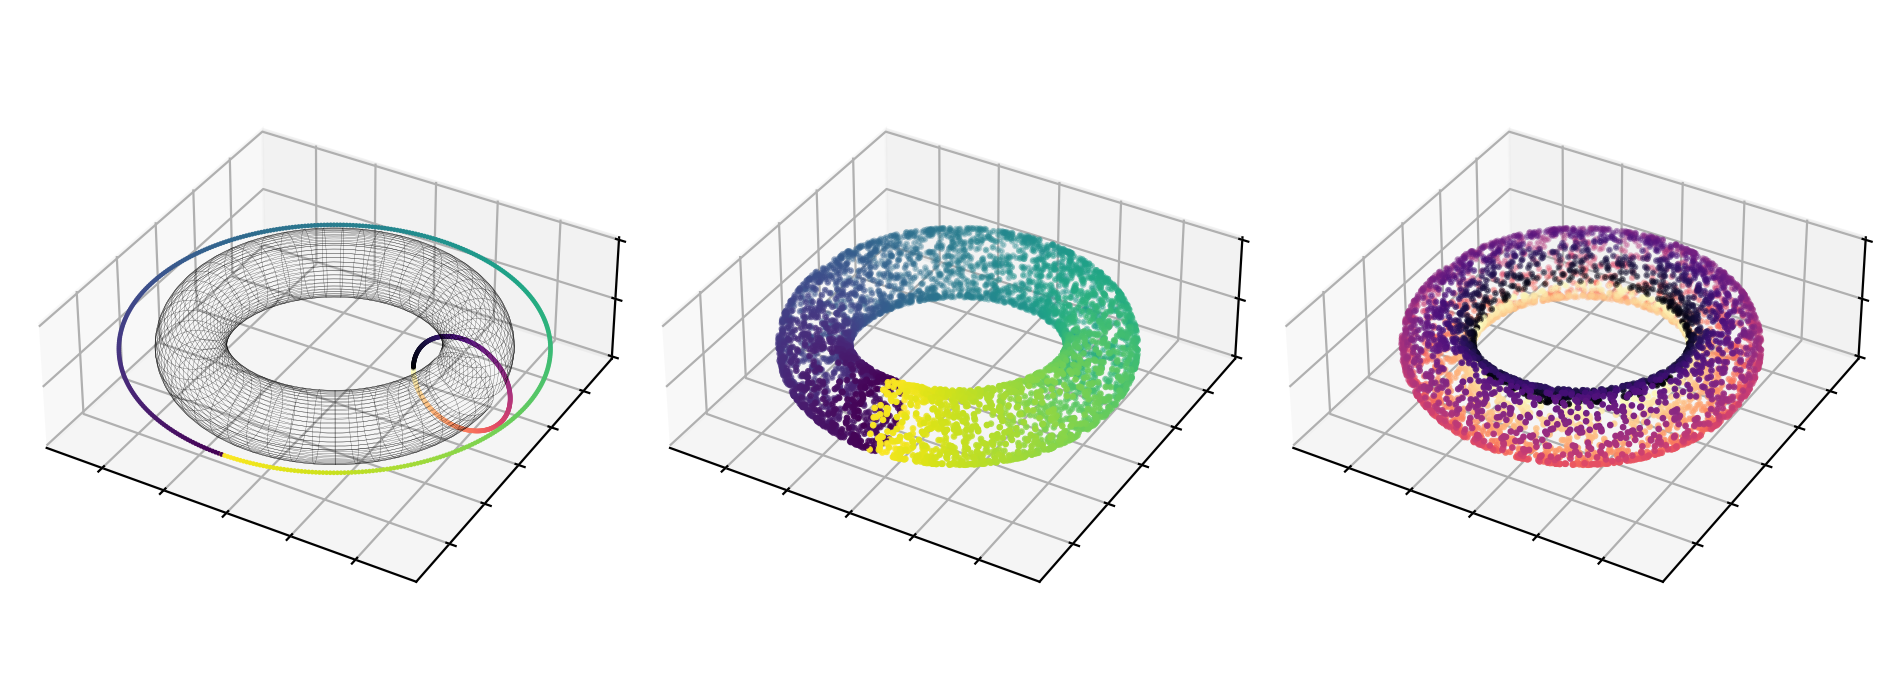

In [5]:
#function for mesh plot of torus
def plot_torus(precision, c, a):
    U = np.linspace(0.2, 2*np.pi, precision)
    V = np.linspace(0, 2*np.pi, precision)
    U, V = np.meshgrid(U, V)
    X = (c+a*np.cos(V))*np.cos(U)
    Y = (c+a*np.cos(V))*np.sin(U)
    Z = a*np.sin(V)
    return X, Y, Z

x, y, z = plot_torus(100, tor_c, tor_rad)

#arrays used for plotting colourbar rings
theta_1 = np.linspace(0, 2*np.pi, 400)
theta_2 = np.linspace(0, 2*np.pi, 400)
circ_1_y = -(tor_c+2*tor_rad)*np.cos(theta_1)
circ_1_x = -(tor_c+2*tor_rad)*np.sin(theta_1)
circ_1_z = np.zeros(400)
circ_2_x = tor_c-1.5*tor_rad*np.cos(theta_2)
circ_2_y = np.zeros(400)
circ_2_z = -1.5*tor_rad*np.sin(theta_2)

#fig = plt.figure()
fig = plt.figure(figsize=(9.5,3.5))

ax = fig.add_subplot(131, projection='3d')

#plot the colormap rings and the wireframe torus
ax.scatter3D(circ_2_x, circ_2_y, circ_2_z, c=cm.magma(np.linspace(1, 0, 400)), s=0.5, alpha=1 )
ax.scatter3D(circ_1_x, circ_1_y, circ_1_z, c=cm.viridis(np.linspace(0, 1, 400)), s=0.5, alpha=1)
ax.plot_wireframe(x, y, z, color = 'k', linewidth = 0.1, alpha=0.8, cstride=2, rstride=2)

ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)
ax.set_zlim(-0.5,0.5)
ax.set_zticks([-0.5,0,0.5])
ax.tick_params(labelbottom=False, labelleft=False)

ax.elev = 35

world_limits = ax.get_w_lims()
ax.set_box_aspect((world_limits[1]-world_limits[0],world_limits[3]-world_limits[2],world_limits[5]-world_limits[4]))

fig.tight_layout()


In [6]:
#now add the sampled points, coloured according their ring coordinates
ax = fig.add_subplot(132, projection='3d')
#ax.set_box_aspect(aspect = (1,1,0.5))
ax.scatter(Z[:,0],Z[:,1],Z[:,2],marker='o',c=color_t1, s=2, cmap='viridis')
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)
ax.set_zlim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.set_zticks([-0.5,0,0.5])
ax.tick_params(labelbottom=False, labelleft=False)
ax.elev = 35

world_limits = ax.get_w_lims()
ax.set_box_aspect((world_limits[1]-world_limits[0],world_limits[3]-world_limits[2],world_limits[5]-world_limits[4]))

ax = fig.add_subplot(133, projection='3d')
ax.scatter(Z[:,0],Z[:,1],Z[:,2],marker='o',c=-color_t2, s=2, cmap='magma')
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)
ax.set_zlim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.set_zticks([-0.5,0,0.5])
ax.tick_params(labelbottom=False, labelleft=False)
ax.elev = 35

world_limits = ax.get_w_lims()
ax.set_box_aspect((world_limits[1]-world_limits[0],world_limits[3]-world_limits[2],world_limits[5]-world_limits[4]))


fig.tight_layout()
#plt.subplots_adjust( wspace=0.2 )

/tmp/ipykernel_28005/2688269221.py:30: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


In [ ]:

plt.savefig('torus_data.png', bbox_inches=matplotlib.transforms.Bbox([[0, 0.5], [9.5, 3]]), pad_inches=0, format='png', dpi=600)

In [7]:
K = knl.rbf_kernel(Z,gamma=1)
#K = knl.sigmoid_kernel(Z)
#K = knl.polynomial_kernel(Z, gamma = 1, coef0=1, degree=3)
#K=knl.laplacian_kernel(Z)

In [9]:
#generate gaussian data and do SVD
    
X = np.random.multivariate_normal(np.zeros(n),K+sigma**2*np.eye(n),size=p)  
X = X.T
  
U, s, Vh = sparse.linalg.svds(X,k=r)

idx = np.argsort(s)
idx = np.flip(idx)
U = U[:,idx]
s = s[idx]
Vh = Vh[idx,:]



<IPython.core.display.Javascript object>


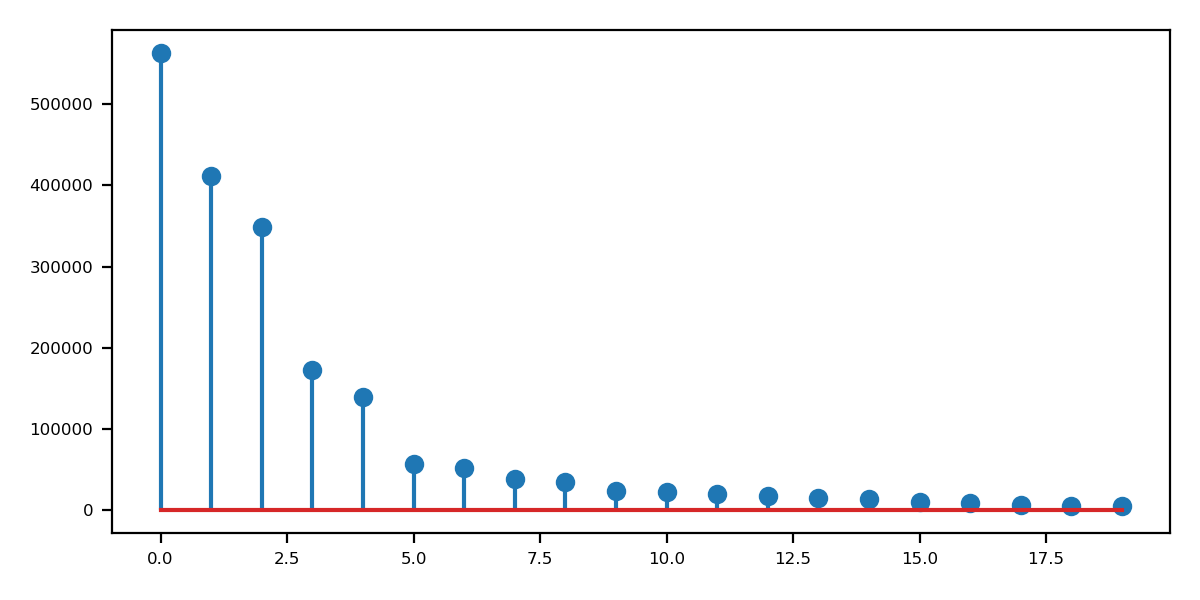

In [11]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.stem(s**2)
fig.tight_layout()


In [14]:
#NB division by square root p as per consistency theorem
zeta = U[:,0:r]@np.diag(s[0:r]) /p**0.5


<IPython.core.display.Javascript object>


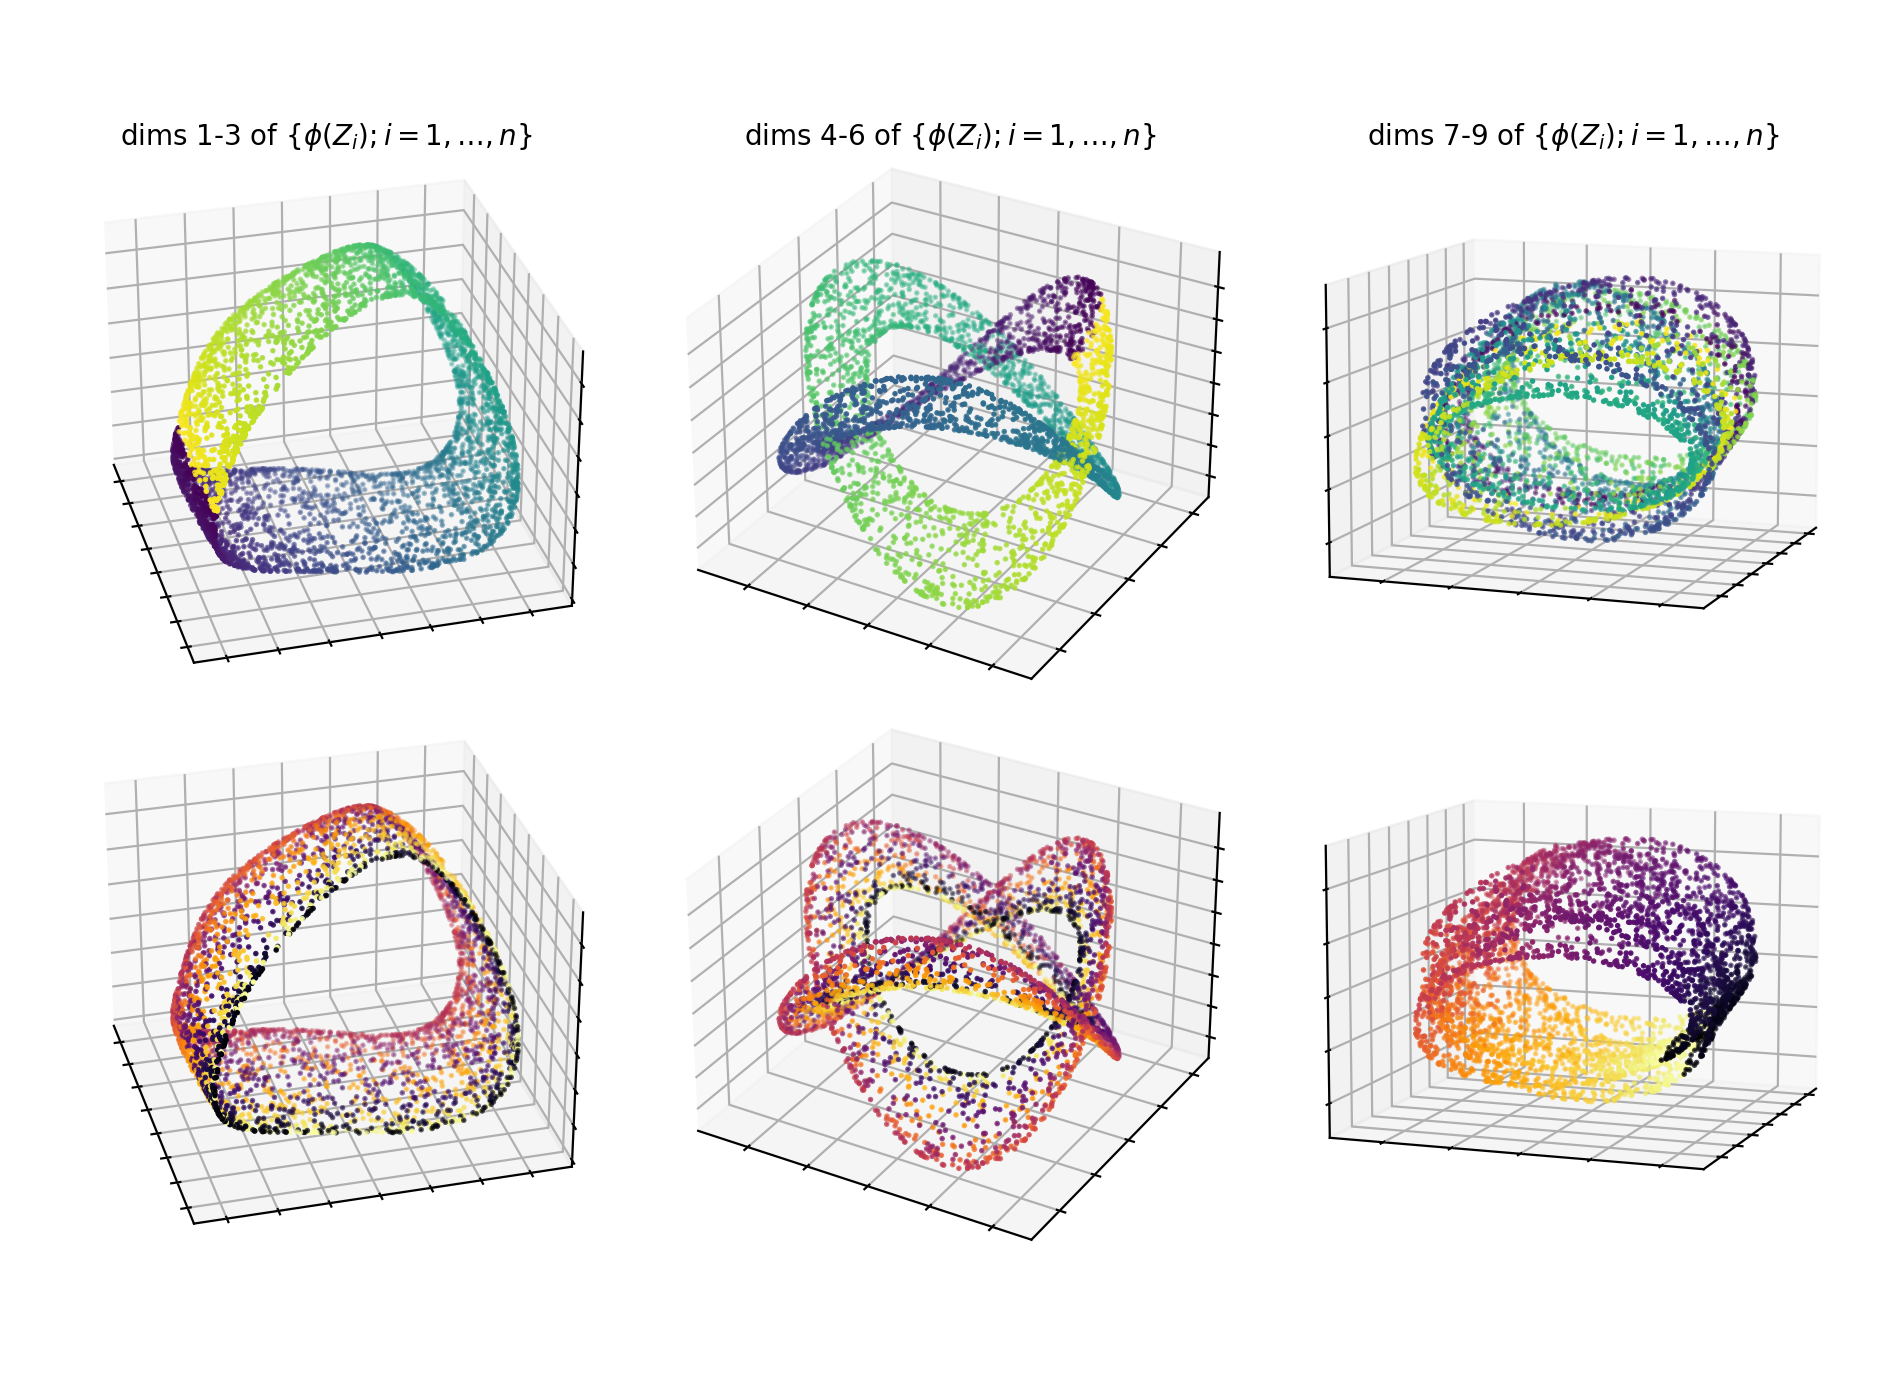

In [15]:


my_cmap = 'viridis'
fig = plt.figure(figsize=(9.5,7))

ax = fig.add_subplot(231, projection='3d')
ax.scatter(zeta[:,0], zeta[:,1], zeta[:,2],  marker='o', c=color_t1, s=1, cmap=my_cmap) #c=color,
ax.azim=-15
ax.set_title(r"dims 1-3 of $\{\phi(Z_i);i=1,\ldots,n\}$", pad=-8, fontsize=10)

ax.tick_params(labelbottom=False, labelleft=False)
ax.zaxis.set_tick_params(labelsize=6)

ax = fig.add_subplot(232, projection='3d')
ax.scatter(zeta[:,3], zeta[:,4], zeta[:,5], marker='o', c=color_t1, s=1, cmap=my_cmap)
ax.set_title(r"dims 4-6 of $\{\phi(Z_i);i=1,\ldots,n\}$", pad=-8, fontsize=10)
ax.tick_params(labelbottom=False, labelleft=False)

ax = fig.add_subplot(233, projection='3d')
ax.scatter(zeta[:,6], zeta[:,7], zeta[:,8], marker='o', c=color_t1, s=1, cmap=my_cmap)
ax.azim=20
ax.elev = 10
ax.set_title(r"dims 7-9 of $\{\phi(Z_i);i=1,\ldots,n\}$", pad=-8, fontsize=10)
ax.tick_params(labelbottom=False, labelleft=False)

my_cmap = 'inferno'

ax = fig.add_subplot(234, projection='3d')
ax.scatter(zeta[:,0], zeta[:,1], zeta[:,2],  marker='o', c=-color_t2, s=1, cmap=my_cmap) #c=color,
ax.azim=-15
ax.tick_params(labelbottom=False, labelleft=False)

ax = fig.add_subplot(235, projection='3d')
ax.scatter(zeta[:,3], zeta[:,4], zeta[:,5], marker='o', c=-color_t2, s=1, cmap=my_cmap)
ax.tick_params(labelbottom=False, labelleft=False)

ax = fig.add_subplot(236, projection='3d')
ax.scatter(zeta[:,6], zeta[:,7], zeta[:,8], marker='o', c=-color_t2, s=1, cmap=my_cmap)
ax.azim=20
ax.elev = 10
ax.tick_params(labelbottom=False, labelleft=False)

fig.tight_layout()
plt.subplots_adjust( hspace=-0.28 )

In [ ]:
plt.savefig('torus_embedding_phi.png', bbox_inches=matplotlib.transforms.Bbox([[0.3, 0.6], [9.3, 6.5]]), pad_inches=0, format='png', dpi=300)

In [16]:
#compute the approximate geodesic distances in Z and M using 5nn graph 
#NB here Isomap is not actually used for dimension reduction - just to compute approximate shortest path lenghts

embedding = Isomap(n_components=3, n_neighbors=5)
_ = embedding.fit_transform(zeta)
dist_mat_M = embedding.dist_matrix_

embedding_Z = Isomap(n_components=3, n_neighbors=5)
_ = embedding_Z.fit_transform(Z)
dist_mat_Z = embedding_Z.dist_matrix_

<IPython.core.display.Javascript object>


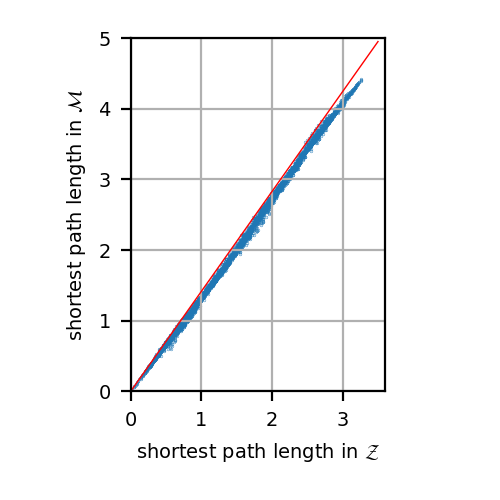

In [17]:
#plot geodesic distance in M against that in Z 

fig = plt.figure(figsize=(2.5,2.5))

ax = fig.add_subplot(111)
ax.scatter(dist_mat_Z[np.triu_indices(n,k=1)][0:n], dist_mat_M[np.triu_indices(n,k=1)][0:n],  marker='.', s=0.1)

#for rbf kernel with gamma=1,H_z = 2 I for all z, and NB need to take square root: <x,H_z x>^1/2, hence sclaing factor of 2^1/2
ax.plot(np.array([0,3.5]),2**0.5*np.array([0,3.5]), color='r', linewidth=0.5)
ax.set_xlabel('shortest path length in $\mathcal{Z}$', fontsize=7)
ax.set_ylabel('shortest path length in $\mathcal{M}$', fontsize=7)
plt.setp(ax.get_xticklabels(), fontsize=7)
plt.setp(ax.get_yticklabels(), fontsize=7)
ax.grid(True)
ax.set_xlim(0,3.6)
ax.set_ylim(0,5)

ax.set_aspect('equal')
fig.tight_layout()

In [ ]:
plt.savefig('torus_path_lengths.png', dpi=300, format='png', bbox_inches='tight')